# The goal is to study factors that influence the total length of the possums.

In [4]:
1qimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
possum= pd.read_csv(r'C:\Users\user\Downloads\possum.csv')
possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [6]:
possum.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [10]:
cleaned_possum= possum.dropna()
cleaned_possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [11]:
cleaned_possum.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [12]:
cleaned_possum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [13]:
cleaned_possum.duplicated().sum()

np.int64(0)

In [14]:
Data_possum= cleaned_possum.drop(['Pop', 'earconch', 'belly', 'eye', 'case'], axis=1)
Data_possum

,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,chest
0,1,m,8.0,94.1,60.4,89.0,36.0,74.5,28.0
1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,28.5
2,1,f,6.0,94.0,60.0,95.5,39.0,75.4,30.0
3,1,f,6.0,93.2,57.1,92.0,38.0,76.1,28.0
4,1,f,2.0,91.5,56.3,85.5,36.0,71.0,28.5
...,...,...,...,...,...,...,...,...,...
99,7,m,1.0,89.5,56.0,81.5,36.5,66.0,23.0
100,7,m,1.0,88.6,54.7,82.5,39.0,64.4,25.0
101,7,f,6.0,92.4,55.0,89.0,38.0,63.5,25.0
102,7,m,4.0,91.5,55.2,82.5,36.5,62.9,25.0


In [15]:
Data_possum.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,chest
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,27.064356
std,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,2.020722
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,22.000000
25%,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,25.500000
50%,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,27.000000
75%,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,28.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,32.000000


C:\Users\user\AppData\Local\Temp\ipykernel_5552\340079114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_possum['hdlngth'])


<Axes: xlabel='hdlngth', ylabel='Density'>

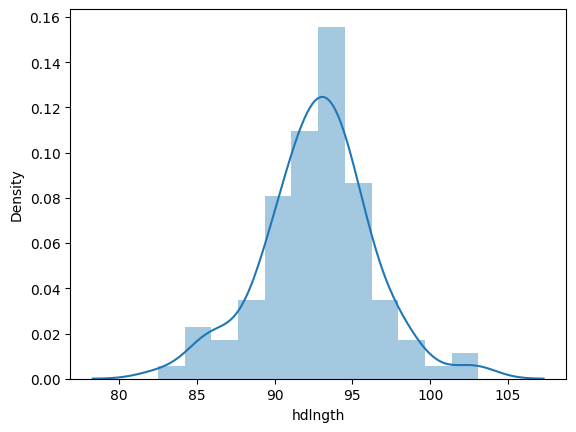

In [16]:
sns.distplot(Data_possum['hdlngth'])

In [17]:
x= Data_possum['hdlngth']
y= Data_possum['totlngth']

In [18]:
a=sm.add_constant(x)
results= sm.OLS(y,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totlngth   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     80.82
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.74e-14
Time:                        12:39:12   Log-Likelihood:                -257.54
No. Observations:                 101   AIC:                             519.1
Df Residuals:                      99   BIC:                             524.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1224      8.254      1.590      0.115      -3.255      29.500
hdlngth        0.7996      0.089      8.990      0.000       0.623       0.976
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.513
Skew:                          -0.079   Prob(JB):                        0.774
Kurtosis:                       2.689   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

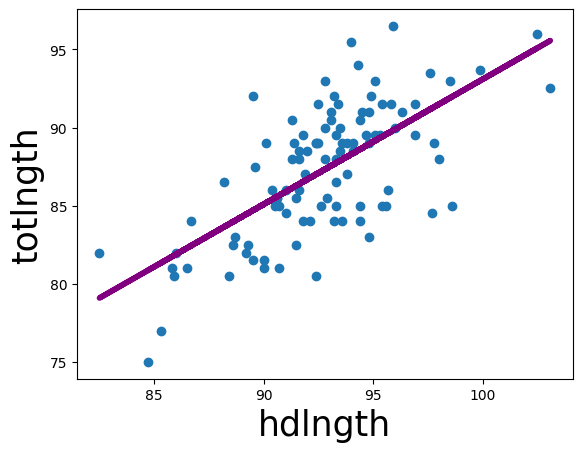

In [20]:
#PLOT THE REGRESSION LINE
plt.scatter(x,y)
yhat = 0.7996 * x +13.12224
fig = plt.plot(x, yhat, lw = 4, c='purple', label ='Regression Line')
plt.xlabel('hdlngth', fontsize =25)
plt.ylabel('totlngth', fontsize =25)
plt.show()

In [21]:
reg= LinearRegression()

Text(0, 0.5, 'age')

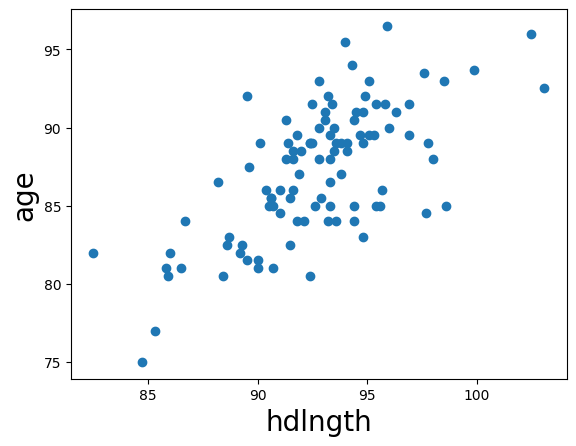

In [22]:
plt.scatter(x,y)
plt.xlabel('hdlngth', fontsize = 20)
plt.ylabel('age', fontsize = 20)

In [35]:
data= Data_possum
data

,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,chest
0,1,m,8.0,94.1,60.4,89.0,36.0,74.5,28.0
1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,28.5
2,1,f,6.0,94.0,60.0,95.5,39.0,75.4,30.0
3,1,f,6.0,93.2,57.1,92.0,38.0,76.1,28.0
4,1,f,2.0,91.5,56.3,85.5,36.0,71.0,28.5
...,...,...,...,...,...,...,...,...,...
99,7,m,1.0,89.5,56.0,81.5,36.5,66.0,23.0
100,7,m,1.0,88.6,54.7,82.5,39.0,64.4,25.0
101,7,f,6.0,92.4,55.0,89.0,38.0,63.5,25.0
102,7,m,4.0,91.5,55.2,82.5,36.5,62.9,25.0


In [36]:
data_dummy = data.copy()
data_dummy

,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,chest
0,1,m,8.0,94.1,60.4,89.0,36.0,74.5,28.0
1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,28.5
2,1,f,6.0,94.0,60.0,95.5,39.0,75.4,30.0
3,1,f,6.0,93.2,57.1,92.0,38.0,76.1,28.0
4,1,f,2.0,91.5,56.3,85.5,36.0,71.0,28.5
...,...,...,...,...,...,...,...,...,...
99,7,m,1.0,89.5,56.0,81.5,36.5,66.0,23.0
100,7,m,1.0,88.6,54.7,82.5,39.0,64.4,25.0
101,7,f,6.0,92.4,55.0,89.0,38.0,63.5,25.0
102,7,m,4.0,91.5,55.2,82.5,36.5,62.9,25.0


In [37]:
data_dummy['sex']= data_dummy['sex'].map({'m':1, 'f':0})
data_dummy

,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,chest
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,28.0
1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,28.5
2,1,0,6.0,94.0,60.0,95.5,39.0,75.4,30.0
3,1,0,6.0,93.2,57.1,92.0,38.0,76.1,28.0
4,1,0,2.0,91.5,56.3,85.5,36.0,71.0,28.5
...,...,...,...,...,...,...,...,...,...
99,7,1,1.0,89.5,56.0,81.5,36.5,66.0,23.0
100,7,1,1.0,88.6,54.7,82.5,39.0,64.4,25.0
101,7,0,6.0,92.4,55.0,89.0,38.0,63.5,25.0
102,7,1,4.0,91.5,55.2,82.5,36.5,62.9,25.0


In [38]:
data_dummy.isna().sum()

site        0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
chest       0
dtype: int64

In [39]:
#Declare inputs and targets
data_preprocessed=data_dummy.copy()
targets= data_preprocessed['totlngth']
inputs= data_preprocessed.drop(['totlngth'], axis= 1)

In [40]:
#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [41]:
inputs_scaled= scaler.transform(inputs)
inputs_scaled

array([[-1.13507515e+00,  8.43720574e-01,  2.19251104e+00,
         3.91090727e-01,  1.11412086e+00, -5.34944337e-01,
         1.38946687e+00,  4.65333782e-01],
       [-1.13507515e+00, -1.18522652e+00,  1.14301524e+00,
        -6.58887487e-02,  2.07173885e-01, -2.80088780e-01,
         9.34051800e-01,  7.14004216e-01],
       [-1.13507515e+00, -1.18522652e+00,  1.14301524e+00,
         3.62529510e-01,  9.84557008e-01,  9.94189005e-01,
         1.59440365e+00,  1.46001552e+00],
       [-1.13507515e+00, -1.18522652e+00,  1.14301524e+00,
         1.34039772e-01,  4.52190678e-02,  4.84477891e-01,
         1.75379893e+00,  4.65333782e-01],
       [-1.13507515e+00, -1.18522652e+00, -9.55976380e-01,
        -3.51500921e-01, -2.13908640e-01, -5.34944337e-01,
         5.92490497e-01,  7.14004216e-01],
       [-1.13507515e+00, -1.18522652e+00, -1.48072428e+00,
         1.05478555e-01, -6.99773092e-01, -7.89799894e-01,
         1.09344707e+00,  1.46001552e+00],
       [-1.13507515e+00,  8.437205

In [48]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size= 0.2, random_state= 365) 
x_train, x_test, y_train, y_test

(array([[-1.13507515e+00,  8.43720574e-01, -4.31228476e-01,
          8.76631420e-01,  4.98692556e-01, -7.89799894e-01,
          8.88510293e-01,  1.95735638e+00],
        [ 1.41253797e+00,  8.43720574e-01, -4.31228476e-01,
         -4.94307007e-01, -1.25041947e+00,  4.84477891e-01,
         -1.04700376e+00, -1.02668882e+00],
        [-1.13507515e+00,  8.43720574e-01,  6.18267332e-01,
          4.83561203e-02,  2.07173885e-01, -1.55436657e+00,
          2.96470702e-01,  4.65333782e-01],
        [ 1.41253797e+00, -1.18522652e+00,  1.14301524e+00,
         -9.44499660e-02, -6.34991165e-01,  4.84477891e-01,
         -1.11531602e+00, -1.02668882e+00],
        [ 9.87935781e-01, -1.18522652e+00,  9.35194284e-02,
         -1.92236787e+00, -9.58900800e-01, -2.80088780e-01,
         -1.75289711e+00, -5.29347953e-01],
        [ 1.38731408e-01,  8.43720574e-01, -9.55976380e-01,
          2.79023298e+00,  1.89150399e+00,  1.50390012e+00,
          1.09344707e+00,  2.45469725e+00],
        [ 5.6333

In [49]:
#Create the model (regression)
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [50]:
y_hat = reg.predict(x_train)
y_hat

array([89.08541421, 84.77987438, 84.84385439, 85.79986205, 81.17649977,
       96.48261456, 86.93517812, 92.60779684, 89.2871057 , 84.68365977,
       93.05831379, 87.58915652, 90.60549022, 94.04892171, 87.9993618 ,
       88.93665444, 91.96693321, 82.95279159, 93.88972873, 86.4058097 ,
       84.69162883, 87.06905119, 87.63526194, 81.48792506, 85.5227236 ,
       89.38225846, 92.38924812, 82.82492124, 94.98725072, 87.91870759,
       88.53810845, 89.35772003, 89.125728  , 90.64106277, 86.47474396,
       83.1994474 , 77.16530118, 85.10559614, 83.31405745, 89.56852144,
       89.69354913, 93.28996235, 81.19714357, 80.70261414, 93.98875853,
       88.23616521, 88.38173398, 82.90245914, 88.38295377, 88.44325807,
       89.76887391, 89.09277442, 86.83785676, 88.10188338, 84.90288482,
       85.38911067, 95.98965731, 84.52195201, 87.77821927, 86.1807936 ,
       88.93948321, 85.31712569, 88.29203497, 86.29350617, 81.03941813,
       88.2893316 , 86.76547003, 90.94092226, 86.77653729, 93.31

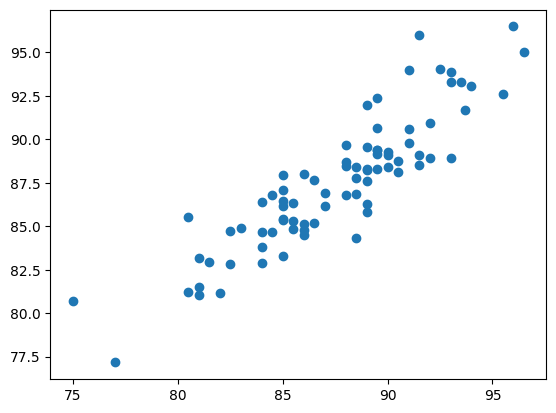

In [51]:
#Create a scatter plot
plt.scatter(y_train, y_hat)
plt.show()

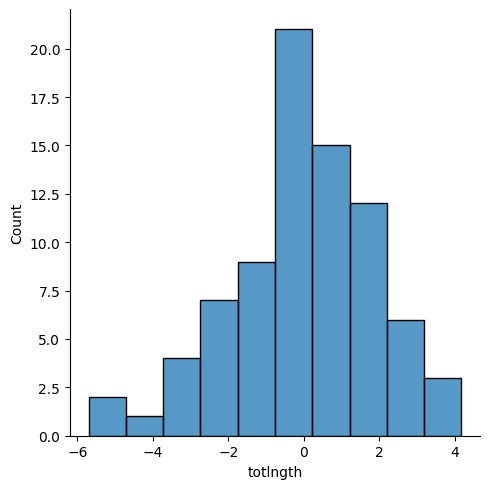

In [52]:
#Residual PLot
sns.displot(y_train - y_hat)

In [53]:
#R-Squared
reg.score(x_train, y_train)

0.7944945587022751

In [54]:
reg.intercept_

np.float64(87.0942278290945)

In [55]:
reg.coef_

array([-1.5738202 , -0.3649685 , -0.20767883,  2.07358562, -0.3442921 ,
        2.45291959,  0.15850339,  0.29303091])

In [56]:
#Summary Table
reg_summary= pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary

,Features
0,site
1,sex
2,age
3,hdlngth
4,skullw
5,taill
6,footlgth
7,chest


In [58]:
#summary table
reg_summary = pd.DataFrame([['intercept'], ['site'], ['age'], ['sex'], ['hdlngth'], ['skullw'], ['taill'],['footlgth'], ['chest'] ], columns=['features'])
reg_summary['weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7]
reg_summary

,features,weights
0,intercept,87.094228
1,site,-1.573820
2,age,-0.364968
3,sex,-0.207679
4,hdlngth,2.073586
5,skullw,-0.344292
6,taill,2.452920
7,footlgth,0.158503
8,chest,0.293031


In [61]:
#Testing
y_hat_test = reg.predict(x_test)
y_hat_test

array([84.66995791, 79.36404271, 83.46773622, 87.69618918, 88.09120783,
       88.86269122, 86.72891101, 89.43782673, 81.69857412, 85.05692702,
       80.58341402, 89.15514418, 81.78759443, 87.84747985, 84.43130781,
       87.71560689, 80.96049656, 79.64902115, 86.45422081, 89.44965953,
       89.20900155])

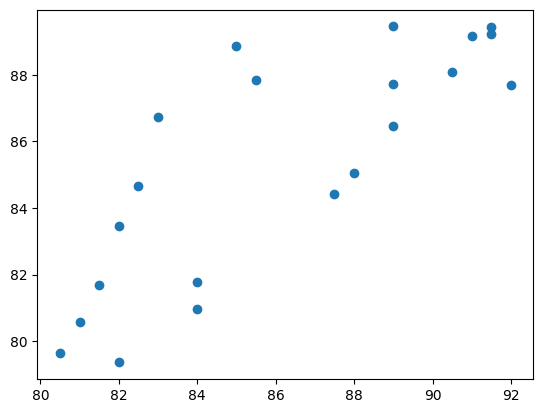

In [59]:
y_hat_test= reg.predict(x_test)
plt.scatter(y_test,y_hat_test)

In [62]:
Data_Pred = pd.DataFrame(y_hat_test, columns= ['Prediction'])
Data_Pred

,Prediction
0,84.669958
1,79.364043
2,83.467736
3,87.696189
4,88.091208
5,88.862691
6,86.728911
7,89.437827
8,81.698574
9,85.056927


In [63]:
y_test

100    82.5
72     82.0
92     82.0
84     92.0
61     90.5
48     85.0
95     83.0
8      91.5
99     81.5
35     88.0
78     81.0
52     91.0
93     84.0
4      85.5
87     87.5
32     89.0
97     84.0
71     80.5
74     89.0
103    89.0
13     91.5
Name: totlngth, dtype: float64

In [66]:
Data_Pred['Target']= (y_test.reset_index(drop=True))
Data_Pred

,Prediction,Target
0,84.669958,82.5
1,79.364043,82.0
2,83.467736,82.0
3,87.696189,92.0
4,88.091208,90.5
5,88.862691,85.0
6,86.728911,83.0
7,89.437827,91.5
8,81.698574,81.5
9,85.056927,88.0


In [68]:
#Checking for error
Data_Pred['Residual']= Data_Pred['Target'] - Data_Pred['Prediction']
Data_Pred['Residual']

0    -2.169958
1     2.635957
2    -1.467736
3     4.303811
4     2.408792
5    -3.862691
6    -3.728911
7     2.062173
8    -0.198574
9     2.943073
10    0.416586
11    1.844856
12    2.212406
13   -2.347480
14    3.068692
15    1.284393
16    3.039503
17    0.850979
18    2.545779
19   -0.449660
20    2.290998
Name: Residual, dtype: float64

In [69]:
#difference percentage
Data_Pred['difference%'] = np.absolute(Data_Pred['Residual']/Data_Pred['Target']*100)
Data_Pred

,Prediction,Target,Residual,difference%
0,84.669958,82.5,-2.169958,2.630252
1,79.364043,82.0,2.635957,3.214582
2,83.467736,82.0,-1.467736,1.789922
3,87.696189,92.0,4.303811,4.678055
4,88.091208,90.5,2.408792,2.661649
5,88.862691,85.0,-3.862691,4.544343
6,86.728911,83.0,-3.728911,4.492664
7,89.437827,91.5,2.062173,2.253741
8,81.698574,81.5,-0.198574,0.243649
9,85.056927,88.0,2.943073,3.344401


In [172]:
Data_Pred.describe()

,Prediction,Target,Residual,difference%
count,21.000000,21.000000,21.000000,21.000000
mean,3.766626,3.952381,0.185755,51.080936
std,0.775741,2.178903,1.944153,55.669375
min,2.435174,1.000000,-3.272829,0.481778
25%,3.220838,2.000000,-1.309144,9.657385
50%,3.760090,4.000000,0.065813,28.037434
75%,4.348539,5.000000,1.121497,65.457217
max,5.272829,9.000000,4.475089,176.410031
